In [ ]:
import zipfile
import os

# ZIP dosyanın Colab içindeki yolu (Dosyanı yüklediğin yer burası olmalı)
zip_path = "/content/drive/MyDrive/beyin_verileri.zip"

# ZIP dosyasını çıkaracağımız hedef klasör
extract_path = "/content/beyin_verileri"

# ZIP dosyasını çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Kendi klasörünü oluştur

print("ZIP dosyası çıkarıldı.")

# Çıkarılan klasör içeriğini kontrol et
print(os.listdir(extract_path))
print("Train klasörü:", os.listdir(os.path.join(extract_path, "train")))
print("Val klasörü:", os.listdir(os.path.join(extract_path, "val")))
print("Test klasörü:", os.listdir(os.path.join(extract_path, "test")))

ZIP dosyası çıkarıldı.
['test', 'train', 'val']
Train klasörü: ['inme_var', 'inme_yok']
Val klasörü: ['inme_var', 'inme_yok']
Test klasörü: ['inme_var', 'inme_yok']


In [ ]:
import numpy as np
import cv2
import os

# Görüntü boyutu
img_size = (128, 128)

# Genel veri yükleme fonksiyonu (ZIP'ten çıkarılan veriler için)
def load_dataset(dataset_type="train", limit=None):
    X, Y = [], []
    classes = ["inme_var", "inme_yok"]

    # ZIP'ten çıkarılan verinin yolu
    dataset_path = f"/content/beyin_verileri/{dataset_type}"

    for label, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        image_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith('.png')]

        # Eğer limit varsa, sadece belirli sayıda görüntü al
        if limit:
            image_files = image_files[:limit]

        for file in image_files:
            img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)  # Gri tonlamalı oku
            img = cv2.resize(img, img_size)  # Boyutu 128x128 yap
            img = img / 255.0  # Normalizasyon (0-1 arasına getir)
            img = np.expand_dims(img, axis=-1)  # CNN için uygun hale getir

            X.append(img)
            Y.append(label)

    return np.array(X), np.array(Y)

# Train, Validation ve Test veri setlerini yükleme
X_train, Y_train = load_dataset("train")
X_val, Y_val = load_dataset("val")
X_test, Y_test = load_dataset("test")

# Veri boyutlarını kontrol et
print(f"Train Set: {X_train.shape}, Labels: {Y_train.shape}")
print(f"Validation Set: {X_val.shape}, Labels: {Y_val.shape}")
print(f"Test Set: {X_test.shape}, Labels: {Y_test.shape}")

Train Set: (4654, 128, 128, 1), Labels: (4654,)
Validation Set: (997, 128, 128, 1), Labels: (997,)
Test Set: (999, 128, 128, 1), Labels: (999,)


In [ ]:
# Y_train, Y_val ve Y_test'in boyutlarını düzeltme
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

# Yeni boyutları kontrol et
print(f"Yeni Y_train shape: {Y_train.shape}")
print(f"Yeni Y_val shape: {Y_val.shape}")
print(f"Yeni Y_test shape: {Y_test.shape}")

Yeni Y_train shape: (4654, 1)
Yeni Y_val shape: (997, 1)
Yeni Y_test shape: (999, 1)


In [ ]:
from tensorflow.keras.models import load_model

# Model dosyanızın yolunu belirtin
model_path = '/content/drive/MyDrive/Model_Kayitlar/EfficientNetB3/Best_Model_EfficientNetB3.keras'

# Modeli yükle
model = load_model(model_path)

# Modeli inceleyelim
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 128, 128, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 40)     │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 40)     │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 40)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 40)     │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 40)     │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 40)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 33,467,780 (127.67 MB)

 Trainable params: 11,125,801 (42.44 MB)

 Non-trainable params: 90,375 (353.03 KB)

 Optimizer params: 22,251,604 (84.88 MB)

In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.callbacks import Callback

model_save_path = "/content/drive/MyDrive/Model_Kayitlar/EfficientNetB3"

# Custom checkpoint callback
class CustomCheckpoint(Callback):
    def __init__(self, save_path, save_freq=10):
        super(CustomCheckpoint, self).__init__()
        self.save_path = save_path
        self.save_freq = save_freq

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_freq == 0:  # Her 10. epoch'ta kaydet
            filepath = os.path.join(self.save_path, f"EfficientNetB3_Epoch_{epoch+1:03d}.keras")
            self.model.save(filepath)
            print(f"Epoch {epoch+1}: Model saved to {filepath}")

# Callback listesi
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True),

    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6, verbose=1),

    ModelCheckpoint(filepath=os.path.join(model_save_path, "Best_Model_EfficientNetB3.keras"),
                    monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False, verbose=2),

    CustomCheckpoint(save_path=model_save_path, save_freq=20)  # Her 10 epoch'ta kaydet
]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=6.2500e-06),  # Optimize Edilmiş Öğrenme Oranı
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)



In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=1000,  # Maksimum epoch sayısı
    batch_size=32,
    callbacks=callbacks,
    verbose=1,
    initial_epoch= 30
)

Epoch 31/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9870 - loss: 0.0394 - precision: 0.9960 - recall: 0.9842
Epoch 31: val_loss improved from 0.59977 to 0.34680, saving model to /content/drive/MyDrive/Model_Kayitlar/EfficientNetB3/Best_Model_EfficientNetB3.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 1067s 7s/step - accuracy: 0.9870 - loss: 0.0394 - precision: 0.9960 - recall: 0.9843 - val_accuracy: 0.9087 - val_loss: 0.3468 - val_precision: 0.9428 - val_recall: 0.9187 - learning_rate: 6.2500e-06
Epoch 32/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9946 - loss: 0.0195 - precision: 0.9964 - recall: 0.9955
Epoch 32: val_loss improved from 0.34680 to 0.32437, saving model to /content/drive/MyDrive/Model_Kayitlar/EfficientNetB3/Best_Model_EfficientNetB3.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 937s 6s/step - accuracy: 0.9946 - loss: 0.0195 - precision: 0.9964 - recall: 0.9955 - val_accuracy: 0.9318 - val_loss: 0.3244 - val_precision: 0.9185 - val_recall: 0.9849 - learning_ra

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import load_model

# Model dosyanızın yolunu belirtin
best_model_path = '/content/drive/MyDrive/Model_Kayitlar/EfficientNetB3/Best_Model_EfficientNetB3.keras'

# Modeli yükle
best_model = load_model(best_model_path)

# Modeli inceleyelim
best_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 128, 128, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 40)     │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 40)     │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 40)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 40)     │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 40)     │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 40)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 33,467,780 (127.67 MB)

 Trainable params: 11,125,801 (42.44 MB)

 Non-trainable params: 90,375 (353.03 KB)

 Optimizer params: 22,251,604 (84.88 MB)

In [ ]:
# Modeli test veri seti ile değerlendir
evaluation_results = best_model.evaluate(X_test, Y_test, verbose=1)

# Çıktıları ekrana yazdır
print(f"✅ Test Loss: {evaluation_results[0]:.4f}")
print(f"✅ Test Accuracy: {evaluation_results[1]:.4f}")

# Eğer precision ve recall gibi ek metrikler varsa, onları da yazdır
if len(evaluation_results) > 2:
    print(f"✅ Test Precision: {evaluation_results[2]:.4f}")
    print(f"✅ Test Recall: {evaluation_results[3]:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9508 - loss: 0.2862 - precision: 0.6230 - recall: 0.6869
✅ Test Loss: 0.1691
✅ Test Accuracy: 0.9670
✅ Test Precision: 0.9661
✅ Test Recall: 0.9850


In [ ]:
import numpy as np

# Modelin tahminlerini al (0-1 arasında olasılıklar döner)
y_pred_prob = best_model.predict(X_test)

# Olasılıkları sınıflara dönüştür (Eşik değeri 0.5 kullanıyoruz)
y_pred = (y_pred_prob > 0.5).astype(int)  # 0.5 üzeri 1, altı 0 olarak etiketlenir

print("Tahminler tamamlandı!")


32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step
Tahminler tamamlandı!


In [ ]:
from sklearn.metrics import classification_report

# Classification Report'u oluştur (2 ondalık basamak göster)
report = classification_report(Y_test, y_pred, target_names=["inme_yok", "inme_var"], digits=4)

# Sonucu ekrana yazdır
print(report)


              precision    recall  f1-score   support

    inme_yok     0.9688    0.9311    0.9496       334
    inme_var     0.9661    0.9850    0.9754       665

    accuracy                         0.9670       999
   macro avg     0.9675    0.9581    0.9625       999
weighted avg     0.9670    0.9670    0.9668       999



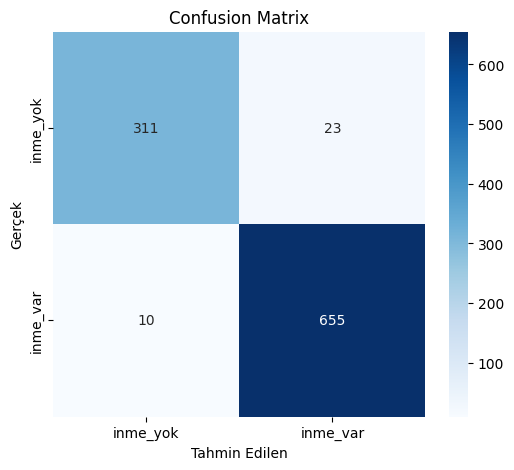

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix hesapla
cm = confusion_matrix(Y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["inme_yok", "inme_var"], yticklabels=["inme_yok", "inme_var"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()
